In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
state = pd.read_csv('../../data/state.csv')

In [3]:
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [4]:
state['Population'].mean()

6162876.3

In [5]:
trim_mean(state['Population'], 0.1)

4783697.125

In [6]:
state['Population'].median()

4436369.5

In [8]:
np.average(state['Murder.Rate'], weights= state['Population'])

4.445833981123393

In [7]:
import wquantiles

In [9]:
wquantiles.median(state['Murder.Rate'], weights= state['Population'])

4.4

In [11]:
state['Population'].std()

6848235.347401142

In [12]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [13]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [14]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

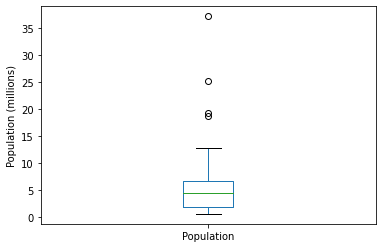

In [17]:
ax = (state['Population'] / 1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [18]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

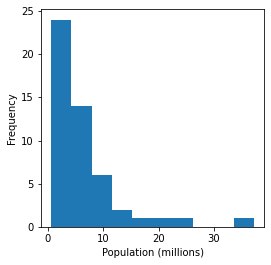

In [19]:
ax = (state['Population'] / 1000000).plot.hist(figsize= (4, 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

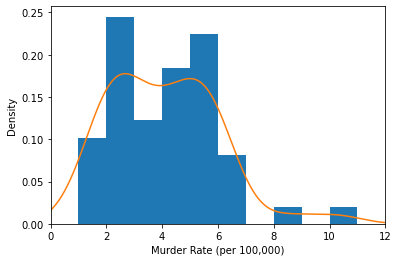

In [20]:
ax = state['Murder.Rate'].plot.hist(density= True, xlim= [0, 12], bins = range(1, 12))
state['Murder.Rate'].plot.density(ax= ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [5]:
dfw = pd.read_csv('../../data/dfw_airline.csv')

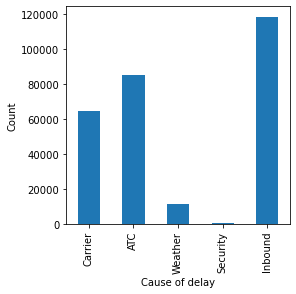

In [7]:
ax = dfw.transpose().plot.bar(figsize= (4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')
plt.show()

In [2]:
sp500_sym = pd.read_csv('../../data/sp500_sectors.csv')
sp500_px = pd.read_csv('../../data/sp500_data.csv.gz', index_col=0)

In [3]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [13]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


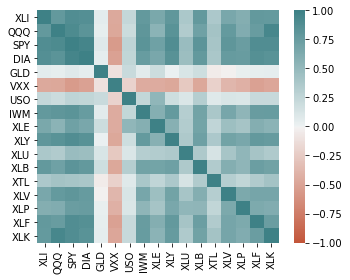

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
                cmap= sns.diverging_palette(20, 200, as_cmap= True),
                ax=ax)
plt.tight_layout()
plt.show()

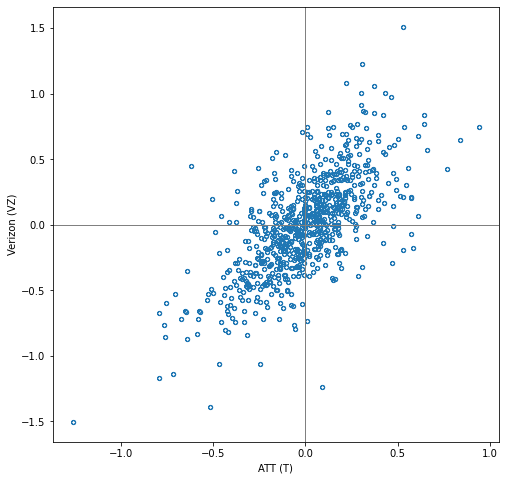

In [11]:
ax = telecom.plot.scatter(x= 'T', y= 'VZ', figsize= (8, 8), marker= '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color= 'grey', lw= 1)
ax.axvline(0, color= 'grey', lw=1)
plt.show()

In [2]:
kc_tax = pd.read_csv('../../data/kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                    (kc_tax.SqFtTotLiving > 100) &
                    (kc_tax.SqFtTotLiving < 3500), :]

kc_tax0.shape

(432693, 3)

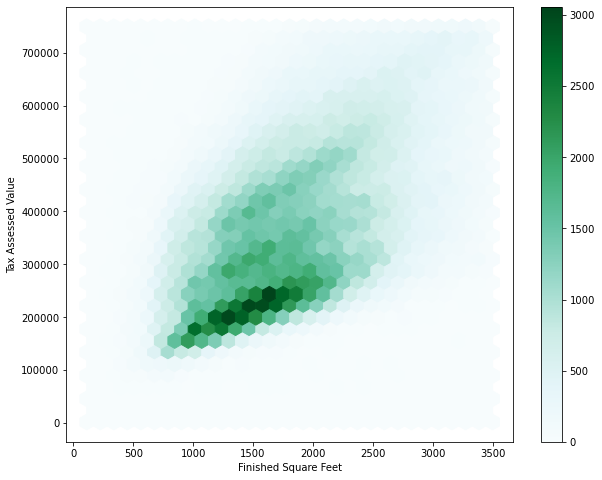

In [3]:
ax = kc_tax0.plot.hexbin(x= 'SqFtTotLiving', y= 'TaxAssessedValue',
                         gridsize= 30, sharex= False, figsize= (10,8))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
plt.show()

In [ ]:
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()